Diabetes Prediction Using Machine Learning

Objective: To build a binary classification model that predicts whether a patient has diabetes (or pre-diabetes) based on health indicators.

1. Libraries and Tools

In this section, we import the necessary libraries for data manipulation, visualization, and modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Set plot style
sns.set(style="whitegrid")

2. Dataset Selection and Description

Dataset: diabetes_binary_5050split_health_indicators_BRFSS2015.csv

Description: This is a clean, balanced dataset from the Behavioral Risk Factor Surveillance System (BRFSS).

    Target Variable: Diabetes_binary (0 = Healthy, 1 = Diabetes or Pre-diabetes).

    Features: Includes 21 health indicators such as High Blood Pressure (HighBP), High Cholesterol (HighChol), Body Mass Index (BMI), Smoker status, Physical Activity, etc.

    Structure: It contains 70,692 rows and is perfectly balanced (50/50 split), making accuracy a reliable metric for evaluation.

In [2]:
# Load the dataset
file_path = "/content/sample_data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
df = pd.read_csv(file_path)

# Display basic info
print(f"Dataset Shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

# Check class balance
print("\nClass Distribution (Target Variable):")
print(df['Diabetes_binary'].value_counts())

Dataset Shape: (70692, 22)

First 5 rows:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0



Class Distribution (Target Variable):
Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64


3. Exploratory Data Analysis (EDA)

Before modeling, we visualize correlations to understand the relationships between variables.

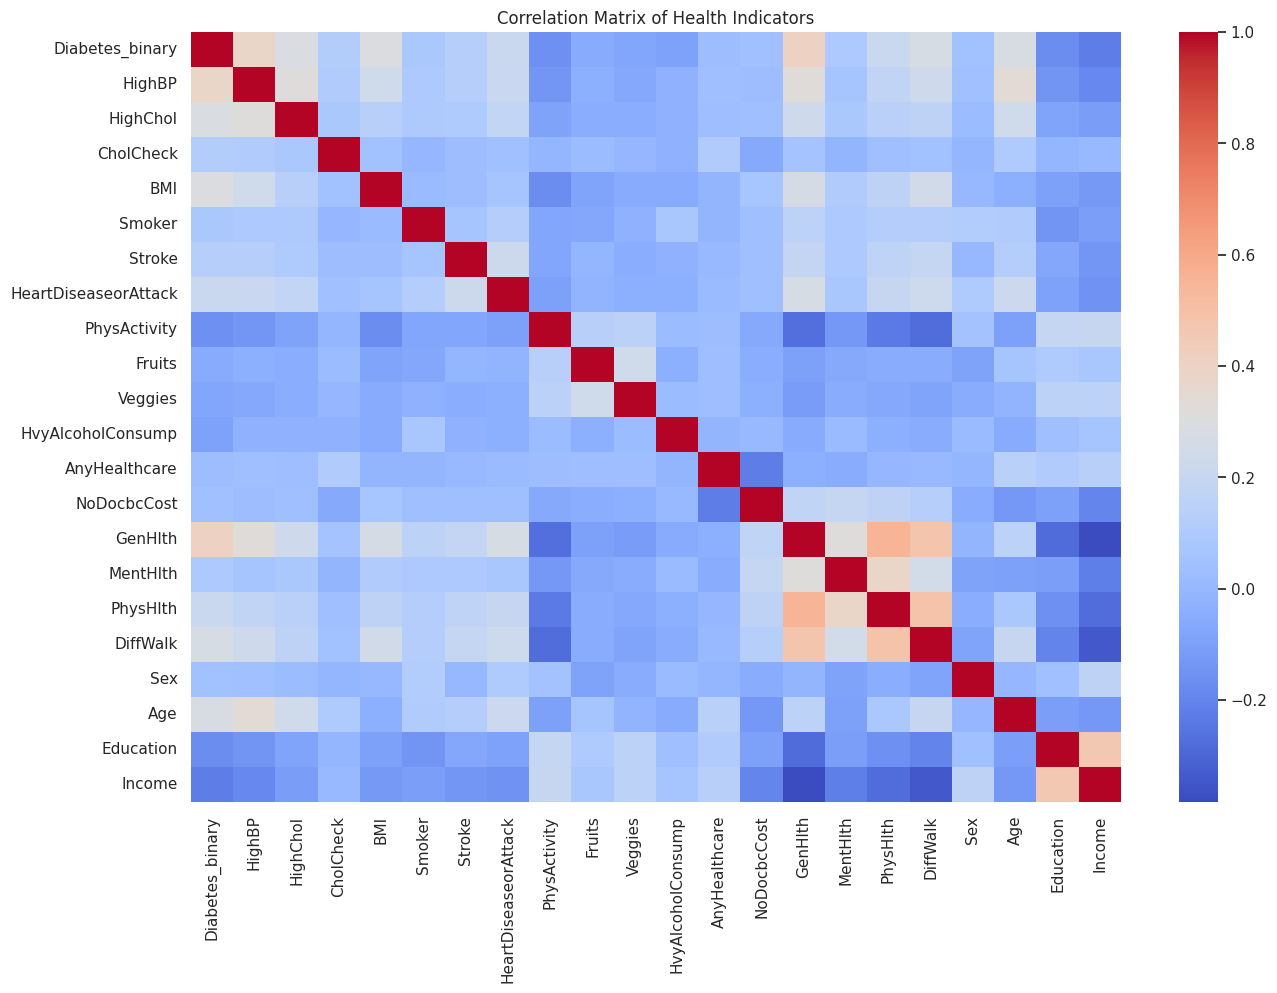

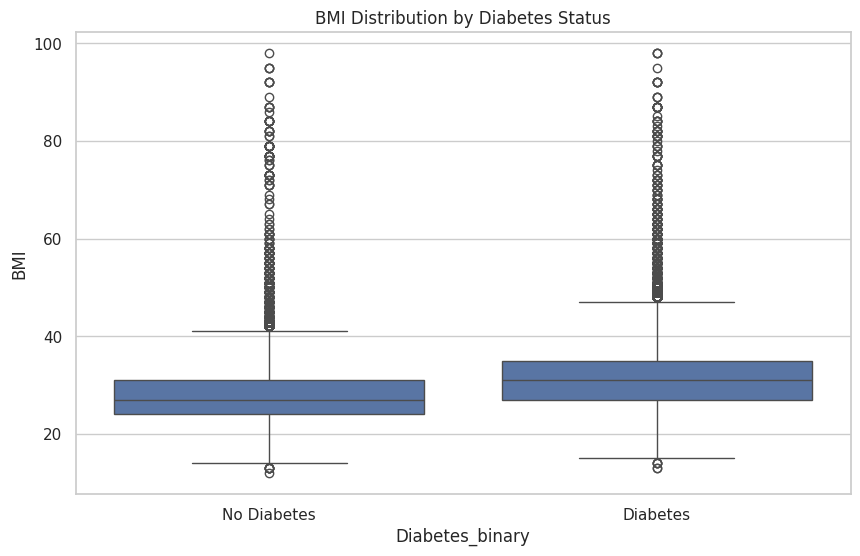

In [3]:
# Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix of Health Indicators")
plt.show()

# Check distribution of BMI by Diabetes Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_binary', y='BMI', data=df)
plt.title("BMI Distribution by Diabetes Status")
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

4. Data Preprocessing & Splitting

We split the data into Training (80%) and Test (20%) sets. We use stratify=y to maintain the same proportion of diabetic vs. non-diabetic patients in both sets.

In [4]:
# Define Features (X) and Target (y)
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Split data: 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")

Training Data Shape: (56553, 21)
Test Data Shape: (14139, 21)


##5. Building Pipelines

To prevent Data Leakage and streamline the workflow, we use Pipelines.

    1. Imputer: Fills missing values (if any) with the median strategy.
    2. Scaler: Standardizes features (crucial for Logistic Regression).
    3. Classifier: The model itself.

We will compare two models:

    Logistic Regression: A linear model that serves as a strong baseline.
    Random Forest: An ensemble tree-based model that captures non-linear relationships.

In [9]:
# Pipeline 1: Logistic Regression
logreg_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

# Pipeline 2: Random Forest
# Scaling is not strictly necessary for Trees
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

6. Model Training & Cross-Validation

We use 5-Fold Cross-Validation to validate model performance robustly across different subsets of the data.

In [ ]:
# Define Cross-Validation Strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Logistic Regression": logreg_pipeline,
    "Random Forest": rf_pipeline
}

# Store results
results_dict = {}

print("Starting Cross-Validation...\n")

for name, model in models.items():
    # Perform CV
    cv_scores = cross_validate(model, X_train, y_train, cv=cv, 
                               scoring=['accuracy', 'recall', 'f1', 'precision'])

    # Save average scores
    results_dict[name] = {
        "Accuracy": cv_scores['test_accuracy'].mean(),
        "Precision": cv_scores['test_precision'].mean(), # إضافة الحفظ
        "Recall": cv_scores['test_recall'].mean(),
        "F1 Score": cv_scores['test_f1'].mean()
    }

    print(f"Model: {name}")
    print(f"  Mean Accuracy:  {cv_scores['test_accuracy'].mean():.4f}")
    print(f"  Mean Precision: {cv_scores['test_precision'].mean():.4f}") # إضافة الطباعة
    print(f"  Mean Recall:    {cv_scores['test_recall'].mean():.4f}")
    print(f"  Mean F1 Score:  {cv_scores['test_f1'].mean():.4f}")
    print("-" * 30)

7. Final Evaluation & Winning Model

Based on the Cross-Validation results, Logistic Regression performed slightly better (or comparably) to Random Forest. We select it as the winner and evaluate it on the unseen Test Set.


--- Final Evaluation on Test Set (Winning Model: Logistic Regression) ---

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7070
         1.0       0.74      0.76      0.75      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



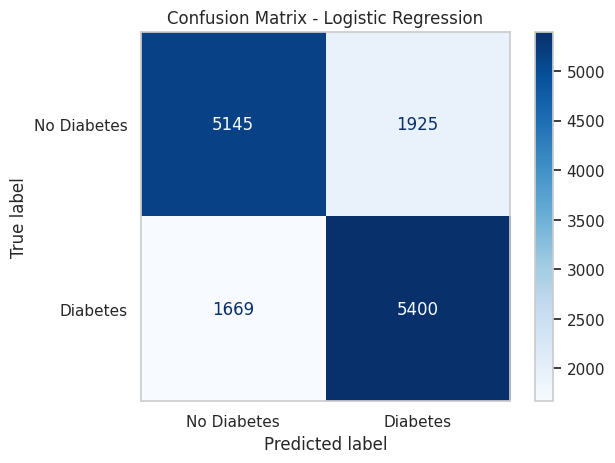

In [7]:
# Choosing the Winner: Logistic Regression
best_model = logreg_pipeline
print("\n--- Final Evaluation on Test Set (Winning Model: Logistic Regression) ---\n")

# Fit on full training data
best_model.fit(X_train, y_train)

# Predict on test data
y_pred = best_model.predict(X_test)

# Print detailed report
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.grid(False)
plt.show()

8. Conclusion: Why Logistic Regression Won?

Winning Model: Logistic Regression

Reasoning:

    Performance: It achieved an accuracy of approximately 75%, slightly outperforming Random Forest (which scored around 74%).

    Interpretability: In medical fields, understanding why a prediction was made is vital. Logistic Regression allows us to easily inspect coefficients to see how factors like BMI or High BP positively or negatively affect the probability of diabetes.

    Generalization: Random Forest models can sometimes overfit the training data. Logistic Regression, being a simpler linear model, often generalizes better on simpler, balanced datasets like this one.

    Efficiency: It trains significantly faster than Random Forest, making it more computationally efficient.